In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [3]:
FILE_NAME = 'analog_pwm_data.txt'

In [60]:
analog_data = pd.read_csv(FILE_NAME)

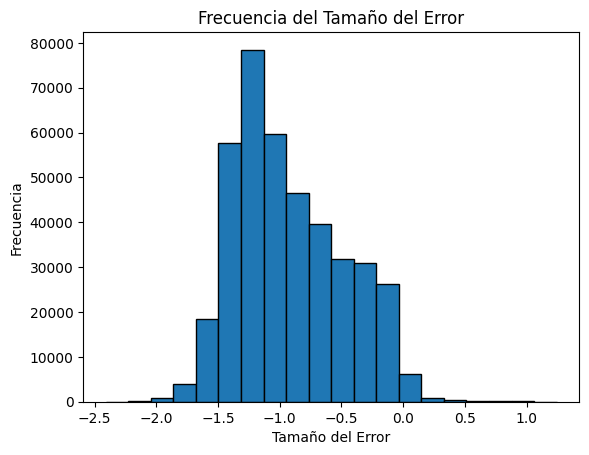

In [62]:
analog_data['error'] = analog_data['read_val'] - analog_data['ratio']

# This relative error has the problem that the ratio can be 0.0 and creates an relative_error = inf
analog_data['relative_error'] = (analog_data['error'] / analog_data['ratio']) * 100
finite_vals = analog_data[np.isfinite(analog_data['relative_error'])]

analog_data['arctang_error'] = np.arctan(analog_data['error'] / 1) * 100


analog_data['percentual_error'] = analog_data['error'] * 100 # Maybe 'percentual_error' is not the correct name


# Crear un histograma del tamaño del error
plt.hist(analog_data['percentual_error'], bins=20, edgecolor='black')
plt.title('Frecuencia del Tamaño del Error')
plt.xlabel('Tamaño del Error')
plt.ylabel('Frecuencia')
plt.show()


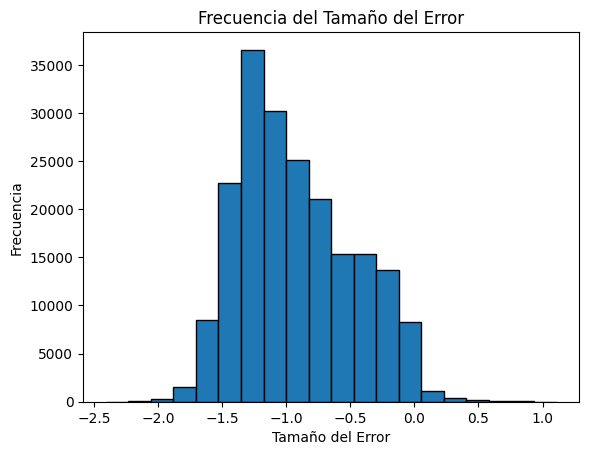

In [54]:
plt.hist(analog_data['arctang_error'], bins=20, edgecolor='black')
plt.title('Frecuencia del Tamaño del Error')
plt.xlabel('Tamaño del Error')
plt.ylabel('Frecuencia')
plt.show()

In [58]:
analog_data[analog_data['ratio'] == 0.0]

,iteration,frequency_in,frequency_out,resolution_out,ratio,read_val,error,relative_error,percentual_error,arctang_error
3030,0,10000,10000,12,0.0,0.0,0.0,NaN,0.0,0.0
3031,1,10000,10000,12,0.0,0.0,0.0,NaN,0.0,0.0
3032,2,10000,10000,12,0.0,0.0,0.0,NaN,0.0,0.0
3033,3,10000,10000,12,0.0,0.0,0.0,NaN,0.0,0.0
3034,4,10000,10000,12,0.0,0.0,0.0,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
174585,0,5000,15000,12,0.0,0.0,0.0,NaN,0.0,0.0
174586,1,5000,15000,12,0.0,0.0,0.0,NaN,0.0,0.0
174587,2,5000,15000,12,0.0,0.0,0.0,NaN,0.0,0.0
174588,3,5000,15000,12,0.0,0.0,0.0,NaN,0.0,0.0


In [57]:
np.arctan(1)

0.7853981633974483

In [48]:
df = analog_data[analog_data['ratio'] == 0.0]
df = df[analog_data['read_val'] != 0.0]
df

/tmp/ipykernel_63222/2403101850.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[analog_data['read_val'] != 0.0]


,iteration,frequency_in,frequency_out,resolution_out,ratio,read_val,error,relative_error,percentual_error
3660,0,10000,10000,12,0.0,0.00045,0.00045,inf,0.045
3665,0,5000,15000,12,0.0,0.00410,0.00410,inf,0.410
10130,0,10000,10000,12,0.0,0.00170,0.00170,inf,0.170
10135,0,5000,15000,12,0.0,0.00320,0.00320,inf,0.320
16010,0,10000,10000,12,0.0,0.00580,0.00580,inf,0.580
16015,0,5000,15000,12,0.0,0.00880,0.00880,inf,0.880
36910,0,10000,10000,12,0.0,0.00105,0.00105,inf,0.105
40130,0,10000,10000,12,0.0,0.00540,0.00540,inf,0.540
40135,0,5000,15000,12,0.0,0.00480,0.00480,inf,0.480
43550,0,10000,10000,12,0.0,0.00265,0.00265,inf,0.265


In [11]:
new_data = analog_data.groupby('ratio')['percentual_error'].mean().reset_index()

In [12]:
new_data

,ratio,percentual_error
0,0.000,0.056288
1,0.001,0.019056
2,0.002,-0.064543
3,0.003,-0.089759
4,0.004,-0.103058
...,...,...
995,0.995,-0.128444
996,0.996,-0.155887
997,0.997,-0.121941
998,0.998,-0.097033


In [41]:
def percentual_error_by_ratio_plotter(df, title):
    plt.plot(df['ratio'], df['percentual_error'])
    plt.ylabel('Percentual Error (%)')
    plt.xlabel('Ratio')
    plt.title(title)

def error_by_ratio(df, title):
    plt.plot(df['ratio'], df['error'])
    plt.ylabel('Error')
    plt.xlabel('Ratio')
    plt.title(title)

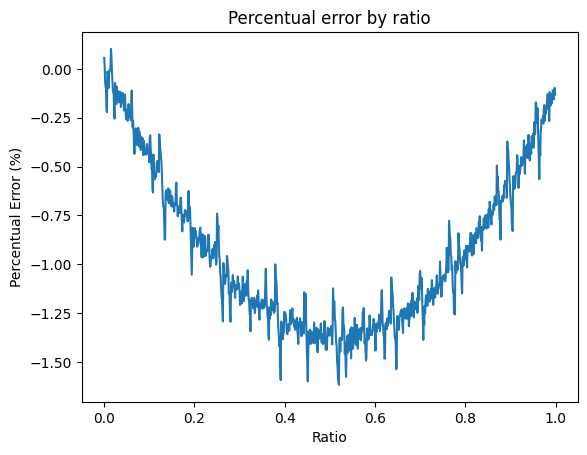

In [63]:
# plt.plot(new_data['ratio'], new_data['percentual_error'])
# plt.ylabel('Percentual Error (%)')
# plt.xlabel('Ratio')
# plt.title('Percentual error by ratio')
percentual_error_by_ratio_plotter(new_data, 'Percentual error by ratio')

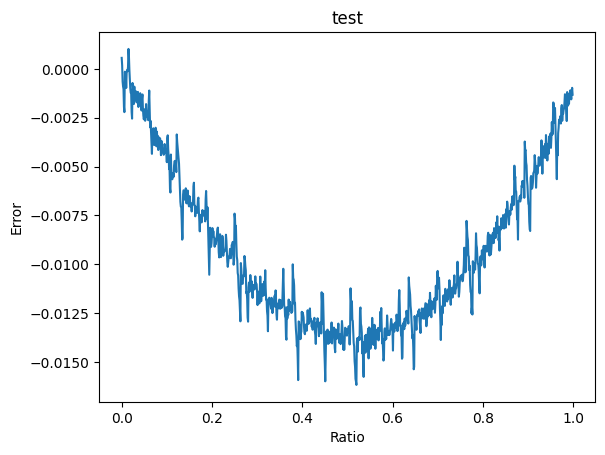

In [43]:
error_by_ratio_df = analog_data.groupby('ratio')['error'].mean().reset_index()
error_by_ratio(error_by_ratio_df, 'test')

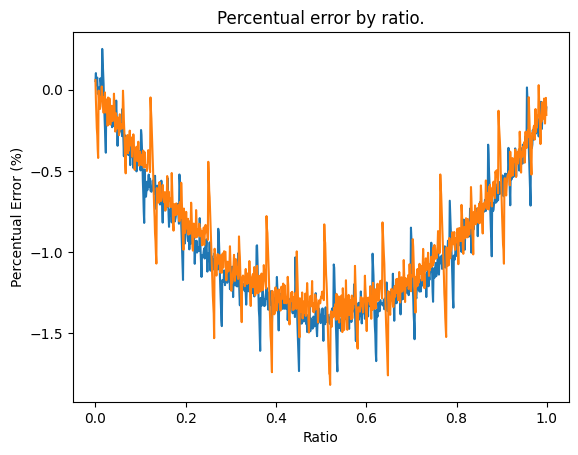

In [29]:
analog_data_a = analog_data[analog_data['frequency_out'] == 10000]
percentual_error_by_ratio_a = analog_data_a.groupby('ratio')['percentual_error'].mean().reset_index()
analog_data_b = analog_data[analog_data['frequency_out'] == 15000]
percentual_error_by_ratio_b = analog_data_b.groupby('ratio')['percentual_error'].mean().reset_index()

# One is for config A and the other is for config B.
# TODO: Add a legend to identify the colors with the configs
percentual_error_by_ratio_plotter(percentual_error_by_ratio_a, 'Percentual error by ratio.')
percentual_error_by_ratio_plotter(percentual_error_by_ratio_b, 'Percentual error by ratio.')



## Analisis de error porcentual por iteracion de lectura
Por cada vez que habia que leer un nuevo ratio, se hacian 5 lecturas continuas para ver si alguna de ellas mejoraba en cuanto a su aproximacion. Se juntaron los errores porcentuales por cada iteracion y se hizo un promedio para ver si en alguna de las iteraciones se conseguia alguna lectura mas acertada. Pero esto no sucedio ya que podemos ver por los graficos de barras que todos andan alrededor de un error porcentual del 0,95.  

In [33]:
iterations_a = analog_data_a.groupby(['iteration'])['percentual_error'].mean().reset_index()
iterations_b = analog_data_b.groupby(['iteration'])['percentual_error'].mean().reset_index()
iterations_a

,iteration,percentual_error
0,0,-0.955779
1,1,-0.943151
2,2,-0.941465
3,3,-0.944781
4,4,-0.942957


<BarContainer object of 5 artists>

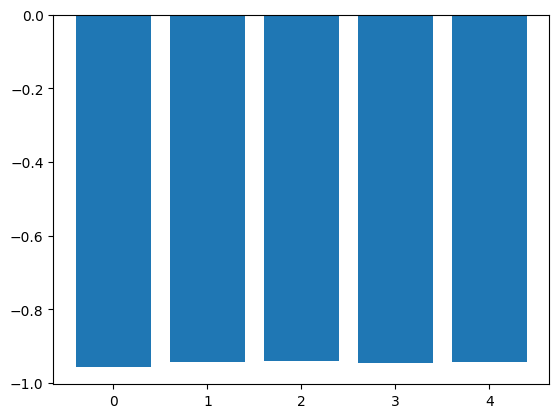

In [34]:
plt.bar(iterations_a['iteration'], iterations_a['percentual_error'])

<BarContainer object of 5 artists>

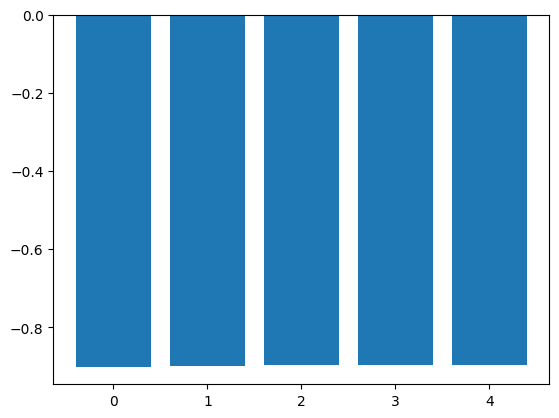

In [35]:
plt.bar(iterations_b['iteration'], iterations_b['percentual_error'])